### 1. 什么是聚类

In [1]:
# make dataset
import pandas as pd
df = pd.read_csv('../data/iris.csv')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [2]:
data = df.values
X = data[:,:2]
X.shape

(150, 2)

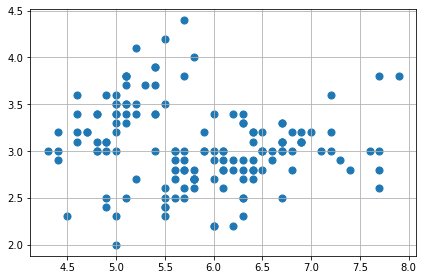

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.scatter(X[:,0], X[:,1], marker='o', s=50)
plt.grid()
plt.tight_layout()

### 2. 什么是Kmeas聚类

In [4]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=3)
y_km = km.fit_predict(X)

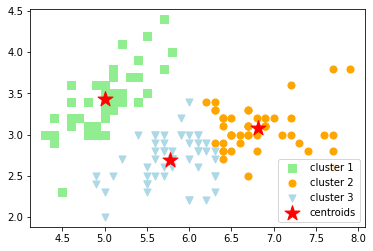

In [5]:
plt.scatter(X[y_km==0,0], 
            X[y_km==0,1], 
            s=50, 
            c='lightgreen', 
            marker='s', 
            label='cluster 1')
plt.scatter(X[y_km==1,0], 
            X[y_km==1,1], 
            s=50, 
            c='orange', 
            marker='o', 
            label='cluster 2')
plt.scatter(X[y_km==2,0], 
            X[y_km==2,1], 
            s=50, 
            c='lightblue', 
            marker='v', 
            label='cluster 3')
plt.scatter(km.cluster_centers_[:,0], 
            km.cluster_centers_[:,1], 
            s=250, 
            marker='*', 
            c='red', 
            label='centroids')
plt.legend()
plt.show();

### 3. 如何实现一个Kmeans算法

In [6]:
import numpy as np
from sklearn.metrics import pairwise_distances


def get_initial_centroids(data, k):
    n = data.shape[0] # 数据样本有多少条，保存在n中      
    # 从n个样本中随机选择k个
    rand_indices = np.random.randint(0, n, k)
    centroids = data[rand_indices,:]   
    return centroids

In [7]:
cent = get_initial_centroids(X,3)
print(cent)

[[5.1 3.8]
 [7.7 3.0]
 [6.3 3.3]]


In [8]:
def assign_clusters(data, centroids):
    # 基于pairwise_distances来计算点和类中心的距离
    distances_from_centroids = pairwise_distances(data, centroids)  
    # 计算距离的最小值
    cluster_assignment = np.argmin(distances_from_centroids, axis=1)  
    return cluster_assignment


In [9]:
cluster_assignment = assign_clusters(X,cent)
print(cluster_assignment)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 2 2 2 2 2 0 2 0 0 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 0 2 2 2 2 0 2 2 2 1 2 2 1 0 1 2 1 2
 2 2 2 2 2 2 1 1 2 2 2 1 2 2 1 2 2 2 1 1 1 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [10]:
def revise_centroids(data, k, cluster_assignment):
    new_centroids = []
    for i in range(k):
        # 遍历所有的类
        member_data_points = data[cluster_assignment == i]
        # 计算类中各样本特征的平均值
        centroid = member_data_points.mean(axis=0)
        new_centroids.append(centroid)
    new_centroids = np.array(new_centroids)
    return new_centroids


In [11]:
revise_centroids(X,3,cluster_assignment)

array([[5.014035087719297, 3.3122807017543865],
       [7.475000000000001, 3.125],
       [6.185185185185183, 2.8679012345679014]], dtype=object)

In [12]:
def my_kmeans(data, k, maxiter=100):
    # 随机初始化
    centroids = get_initial_centroids(data, k)
    prev_cluster_assignment = None
    
    for itr in range(maxiter):    #循环迭代            
        # 1. 计算每个样本应该归入哪个类里面去
        cluster_assignment = assign_clusters(data, centroids)
            
        # 2. 重新计算类中心
        centroids = revise_centroids(data, k, cluster_assignment)
            
        # 检查是否应该停止，如果前后两次聚类结果完全一样就跳出循环
        if prev_cluster_assignment is not None and \
          (prev_cluster_assignment==cluster_assignment).all():
            break

        prev_cluster_assignment = cluster_assignment[:]
        
    return centroids, cluster_assignment

In [13]:
centers, y_km = my_kmeans(X, 3)

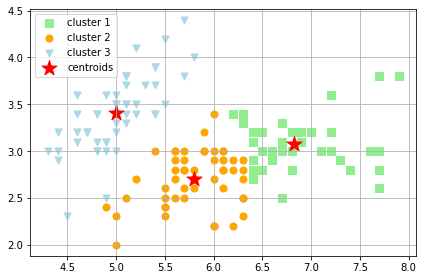

In [14]:
plt.scatter(X[y_km==0,0], 
            X[y_km==0,1], 
            s=50, 
            c='lightgreen', 
            marker='s', 
            label='cluster 1')
plt.scatter(X[y_km==1,0], 
            X[y_km==1,1], 
            s=50, 
            c='orange', 
            marker='o', 
            label='cluster 2')
plt.scatter(X[y_km==2,0], 
            X[y_km==2,1], 
            s=50, 
            c='lightblue', 
            marker='v', 
            label='cluster 3')
plt.scatter(centers[:,0], 
            centers[:,1], 
            s=250, 
            marker='*', 
            c='red', 
            label='centroids')
plt.legend()
plt.grid()
plt.tight_layout()
#plt.savefig('./figures/centroids.png', dpi=300)

### 练习


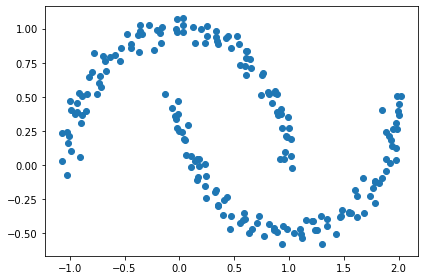

In [15]:
# 生成半月形数据

from sklearn.datasets import make_moons

X, y = make_moons(n_samples=200, noise=0.05, random_state=0)
plt.scatter(X[:,0], X[:,1])
plt.tight_layout()


In [16]:
from sklearn.cluster import DBSCAN

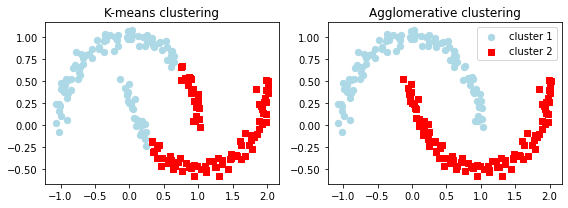

In [17]:
# complete linkage clustering
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(8,3))

km = KMeans(n_clusters=2, random_state=0)
y_km = km.fit_predict(X)
ax1.scatter(X[y_km==0,0], X[y_km==0,1], c='lightblue', marker='o', s=40, label='cluster 1')
ax1.scatter(X[y_km==1,0], X[y_km==1,1], c='red', marker='s', s=40, label='cluster 2')
ax1.set_title('K-means clustering')

db = DBSCAN(eps=0.2, min_samples=5, metric='euclidean')
y_db = db.fit_predict(X)
ax2.scatter(X[y_db==0,0], X[y_db==0,1], c='lightblue', marker='o', s=40, label='cluster 1')
ax2.scatter(X[y_db==1,0], X[y_db==1,1], c='red', marker='s', s=40, label='cluster 2')
ax2.set_title('Agglomerative clustering')

plt.legend()
plt.tight_layout()
#plt.savefig('./figures/kmeans_and_ac.png', dpi=300)